<div align='left'>
    <h1 style="color: #FFA500; font-size: 36px; font-weight: bold;">[LAB 07] SỰ PHÂN TÍCH NHÓM (TT)</h1>
</div>

> **Sinh viên:** Nguyễn Công Hoài Nam  
> **Mã số sinh viên:** 21280099

## **Import Data and Preprocessing**

Import thư viện

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

Đọc dữ liệu từ file `data.csv`

In [127]:
path_to_file = "D:\\Courses HK2 23-24\\Data Mining\\LAB\\LAB 07\\data.csv"
customer_data = pd.read_csv(path_to_file)

customer_data.shape

(200, 5)

In [128]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [129]:
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [130]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Chia cột `Age` thành 10 nhóm khác nhau

In [131]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data["Age"]
customer_data["Age Groups"] = pd.cut(x = col, bins = intervals)
customer_data["Age Groups"]

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [132]:
customer_data.groupby("Age Groups", observed=True)["Age Groups"].count()

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

Chuyển 2 cột `Age` và `Genre` thành dạng số

In [133]:
customer_data_oh = pd.get_dummies(customer_data, dtype= int)
customer_data_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


Bỏ cột `CustomerID` và vẽ plot

In [134]:
customer_data = customer_data.drop("CustomerID", axis= 1)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

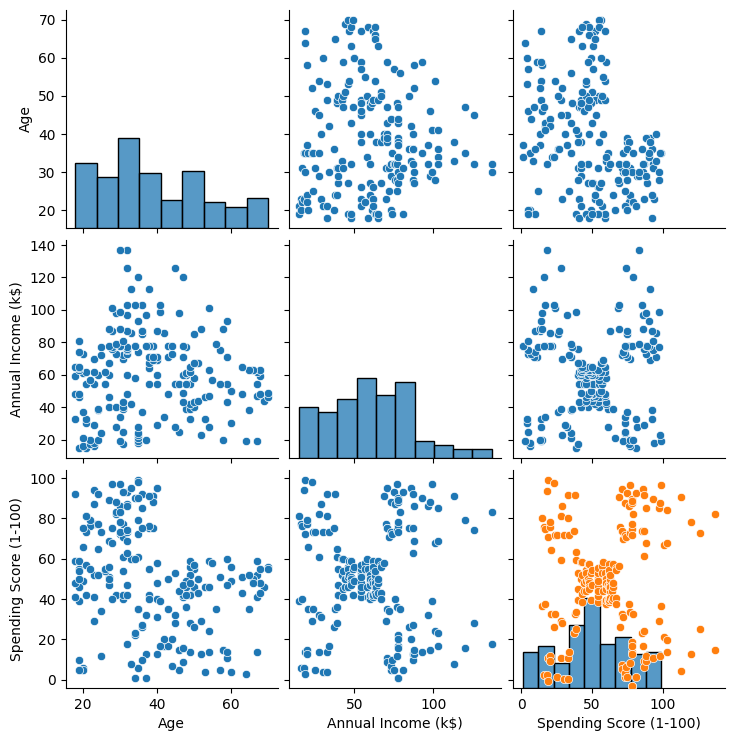

In [135]:
sns.pairplot(customer_data)

sns.scatterplot(x =customer_data["Annual Income (k$)"], 
                y = customer_data["Spending Score (1-100)"])

## **Hierarchical Algorithm From Library**

Bỏ cột `Age` và vẽ `dendrogram`

In [136]:
customer_data_oh = customer_data_oh.drop(["Age"], axis= 1)
customer_data_oh.shape

(200, 11)

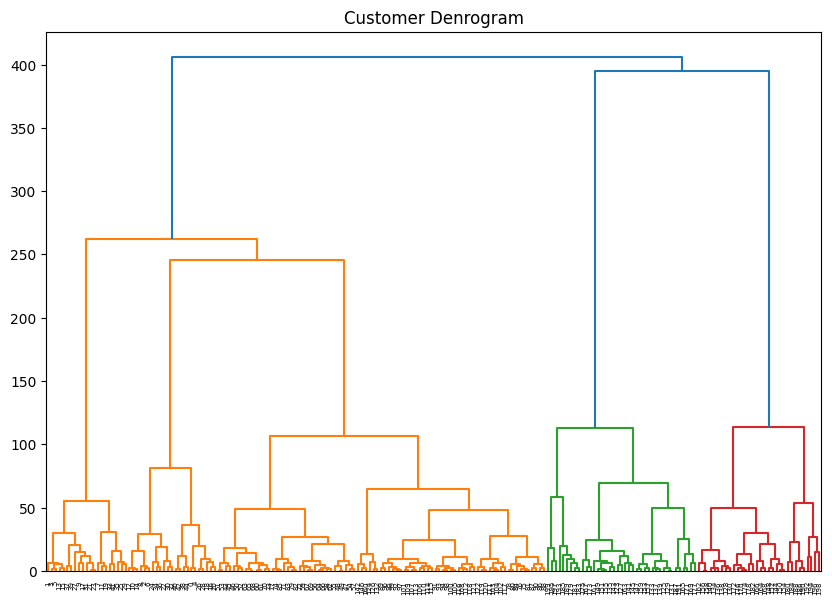

In [137]:
plt.figure(figsize=(10,7))
plt.title("Customer Denrogram")

selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric= 'euclidean')
shc.dendrogram(Z=clusters)
plt.show()


Vẽ đường nằm ngang đi qua khoảng cách dài nhất

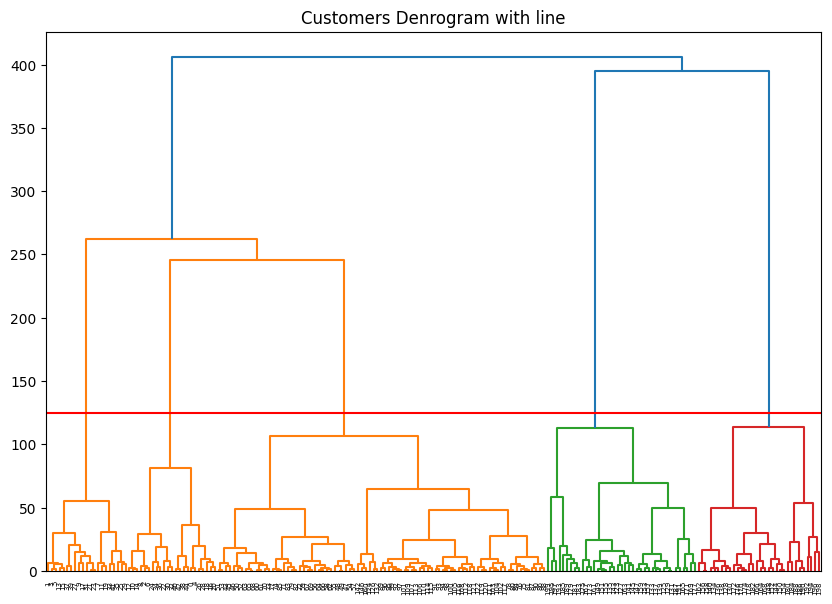

In [138]:
plt.figure(figsize=(10,7))
plt.title("Customers Denrogram with line")
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric= 'euclidean')
shc.dendrogram(Z = clusters)
plt.axhline(y =125, color = "r", linestyle = "-")
plt.show()

Thực thi phân cụm với dữ liệu ban đầu

In [139]:
clustering_model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage= "ward")
clustering_model.fit(selected_data)
clustering_model.labels_


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

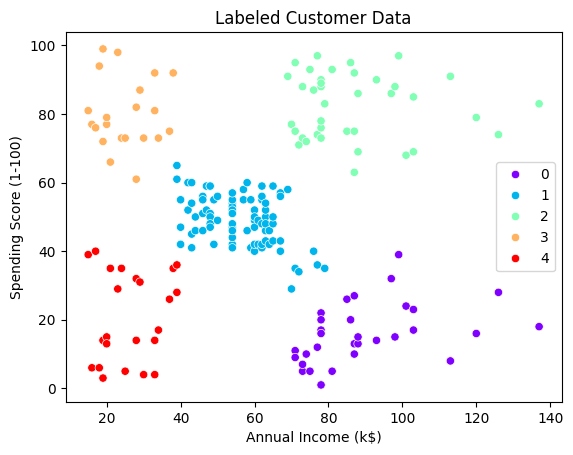

In [140]:
data_labels = clustering_model.labels_
sns.scatterplot(x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                data = selected_data, 
                hue= data_labels,
                palette= "rainbow").set_title("Labeled Customer Data")

plt.show()

## **Hierarchical Algorithm From Scratch**

### Tính hàm tiêu chuẩn liên kết `(linkage criteria)`

Các **linkage criteria** gồm:
- **Complete-linkage**: $L(r,s) = \max (D(x_{ri},x_{sj}))$

- **Single-linkage**: $L(r,s) = \min (D(x_{ri},x_{sj}))$

- **Average-linkage**: $L(r,s) = \frac{1}{n_r n_s} \sum_{i=1}^{n_r} \sum_{j=1}^{n_s} D(x_{ri},x_{sj})$

- **Ward-linkage**: $$L(r,s) = \sum_{x_i \in r \cup s} ||x_i - m||_2 - \sum_{x_i \in r} ||x_i - m_1||_2 - \sum_{x_i \in s} ||x_i - m_2||_2 $$

Giả sử $m, m_1, m_2$ lần lượt là tâm cụm $r \cup s, r,s$

Với $D(a,b) = \sqrt{(a-b)^2} = || a - b ||_2$ (Norm 2 hay khoảng cách Euclidean)


In [141]:
import numpy as np

def euclid_distance(a, b):
    # Tính khoảng cách Euclid giữa hai điểm a và b
    return np.sqrt(np.sum((np.array(a) - np.array(b)) ** 2))

def single_linkage(r, s):
    # Tính khoảng cách liên kết đơn giữa hai cụm r và s
    # Khoảng cách liên kết đơn là khoảng cách ngắn nhất giữa bất kỳ cặp điểm nào từ hai cụm
    return np.min([euclid_distance(xi, xj) for xi in r for xj in s])

def complete_linkage(r, s):
    # Tính khoảng cách liên kết đầy đủ giữa hai cụm r và s
    # Khoảng cách liên kết đầy đủ là khoảng cách lớn nhất giữa bất kỳ cặp điểm nào từ hai cụm
    return np.max([euclid_distance(xi, xj) for xi in r for xj in s])

def average_linkage(r, s):
    # Tính khoảng cách liên kết trung bình giữa hai cụm r và s
    # Khoảng cách liên kết trung bình là khoảng cách trung bình giữa tất cả các cặp điểm từ hai cụm
    return np.mean([euclid_distance(xi, xj) for xi in r for xj in s])

def ward_linkage(r, s):
    # Tính khoảng cách liên kết Ward giữa hai cụm r và s
    # Phương pháp liên kết Ward tối thiểu hóa tổng phương sai tăng thêm khi gộp hai cụm
    r_s = r + s  # Gộp hai cụm r và s
    centroid_r = np.mean(r, axis=0)  # Tính tâm cụm r
    centroid_s = np.mean(s, axis=0)  # Tính tâm cụm s
    centroid_rs = np.mean(r_s, axis=0)  # Tính tâm của cụm gộp r_s
    
    # Tính tổng bình phương khoảng cách từ các điểm trong cụm r đến tâm cụm r
    ss_r = np.sum([euclid_distance(xi, centroid_r) ** 2 for xi in r])
    
    # Tính tổng bình phương khoảng cách từ các điểm trong cụm s đến tâm cụm s
    ss_s = np.sum([euclid_distance(xj, centroid_s) ** 2 for xj in s])
    
    # Tính tổng bình phương khoảng cách từ các điểm trong cụm gộp r_s đến tâm cụm r_s
    ss_rs = np.sum([euclid_distance(xij, centroid_rs) ** 2 for xij in r_s])
    
    # Tính khoảng cách liên kết Ward
    return ss_rs - (ss_r + ss_s)

def get_linkage_method(linkage):
    # Chọn phương pháp liên kết dựa trên tham số đầu vào
    if linkage == 'single':
        return single_linkage
    elif linkage == 'complete':
        return complete_linkage
    elif linkage == 'average':
        return average_linkage
    elif linkage == 'ward':
        return ward_linkage
    else:
        # Nếu tham số không hợp lệ, báo lỗi
        raise ValueError("Invalid linkage method. Choose from 'single', 'complete', 'average', 'ward'.")


Class Agglomerative Clustering tự cài đặt

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

class AgglomerativeClusteringFromScratch:
    def __init__(self, n_clusters, linkage='ward'):
        self.n_clusters = n_clusters  # Số cụm
        self.linkage = get_linkage_method(linkage)  # Lấy hàm linkage ứng với tham số linkage
        self.method = linkage  # lưu lại linkage method để trực quan

    # Hàm khởi tạo các phân cụm
    def init_clusters(self, data):
        return {data_id: [data_point] for data_id, data_point in enumerate(data)}  # Mỗi điểm dữ liệu là một cụm riêng biệt

    # Hàm tìm cặp cụm gần nhất để hợp nhất
    def find_closest_clusters(self):
        clusters_ids = list(self.clusters.keys())  # Lấy danh sách các ID của các cụm hiện tại
        # Tạo tất cả các cặp có thể từ các cụm hiện tại
        cluster_combinations = [(clusters_ids[i], clusters_ids[j])
                                for i in range(len(clusters_ids)-1)
                                for j in range(i+1, len(clusters_ids))]
        # Tính khoảng cách giữa các cụm và chọn cặp gần nhất
        distances = [self.linkage(self.clusters[xi], self.clusters[xj])
                     for xi, xj in cluster_combinations]
        closest_index = np.argmin(distances)  # Tìm chỉ số của cặp cụm có khoảng cách nhỏ nhất
        closest_clusters = cluster_combinations[closest_index]  # Lấy cặp cụm gần nhất
        return closest_clusters  # Trả về cặp cụm gần nhất

    # Hàm hợp nhất các cụm và tạo cụm mới
    def merge_and_form_new_clusters(self, xi_id, xj_id):
        new_clusters = {0: self.clusters[xi_id] + self.clusters[xj_id]}  # Tạo một cụm mới bằng cách hợp nhất hai cụm gần nhất
        new_cluster_id = 1  # Khởi tạo ID cho các cụm mới
        # Duyệt qua tất cả các cụm hiện tại và hợp nhất cụm nếu không phải là cụm được chọn để hợp nhất
        for cluster_id, points in self.clusters.items():
            if cluster_id != xi_id and cluster_id != xj_id:
                new_clusters[new_cluster_id] = points  # Thêm các cụm không bị hợp nhất vào dictionary mới
                new_cluster_id += 1  # Tăng ID cụm mới
        self.clusters = new_clusters  # Cập nhật lại các cụm mới

    # Hàm huấn luyện mô hình
    def fit(self, data):
        self.data = data.values.tolist()  # Chuyển đổi DataFrame thành danh sách các điểm dữ liệu
        self.col_names = data.columns  # Lưu tên của các cột dữ liệu
        self.clusters = self.init_clusters(self.data)  # Khởi tạo các cụm ban đầu từ dữ liệu

        # Tiếp tục hợp nhất các cụm cho đến khi đạt được số lượng cụm mong muốn
        while len(self.clusters.keys()) > self.n_clusters:
            closest_clusters = self.find_closest_clusters()  # Tìm cặp cụm gần nhất
            self.merge_and_form_new_clusters(*closest_clusters)  # Hợp nhất cặp cụm gần nhất

        # Gán nhãn cho từng điểm dữ liệu dựa trên các cụm
        self.labels = np.array([None] * len(data))  # Khởi tạo mảng nhãn cho các điểm dữ liệu
        for i, d in enumerate(self.data):
            for cluster_id, points in self.clusters.items():
                if d in points:
                    self.labels[i] = cluster_id  # Gán nhãn cho điểm dữ liệu
                    break  # Thoát khỏi vòng lặp khi đã tìm thấy cụm chứa điểm dữ liệu

    # Hàm trực quan hóa dữ liệu
    def visualize(self, show_dendrogram=False):
        data = pd.DataFrame(self.data, columns=self.col_names)  # Tạo DataFrame từ dữ liệu đã chuyển đổi

        if show_dendrogram: # 2 plot
            fig, axes = plt.subplots(1, 2, figsize=(24, 7))  # Tạo subplot cho cả scatter plot và dendrogram
            fig.suptitle(f'Cluster Analysis From Scratch Using {self.method.capitalize()} Linkage', fontsize=20, fontweight='bold')  # Đặt tiêu đề chung cho cả hai subplot

            # Trực quan hóa dữ liệu cụm
            sns.scatterplot(ax=axes[0], x=self.col_names[0], y=self.col_names[1],
                            data=data, hue=self.labels, palette="rainbow").set_title("Visualization of Clustered Data")  # Vẽ scatter plot của dữ liệu cụm
            axes[0].legend(title="Clusters", loc="upper right")  # Thêm chú thích cho các nhãn cụm

            # Trực quan hóa dendrogram
            axes[1].set_title("Dendrogram Plot with Line")  # Đặt tiêu đề cho dendrogram
            clusters = shc.linkage(data, method=self.method, metric='euclidean')  # Tạo liên kết cho dendrogram
            shc.dendrogram(Z=clusters, ax=axes[1])  # Vẽ dendrogram trên subplot thứ hai
            max_y = max(shc.maxdists(clusters))  # Tìm giá trị y lớn nhất trên dendrogram
            axes[1].axhline(y=0.7 * max_y, color="black", linestyle="--")  # Vẽ đường ngang trên dendrogram

            plt.show()  # Hiển thị plot
 
        else: # 1 plot
            # Trực quan hóa dữ liệu cụm
            sns.scatterplot(x=self.col_names[0], y=self.col_names[1],
                            data=data, hue=self.labels, palette="rainbow").set_title("Visualization of Clustered Data From Scratch")  # Vẽ scatter plot của dữ liệu cụm
            plt.show()  # Hiển thị plot



## **Test Case (So Sánh Với Thư Viện)**

In [143]:
df = selected_data.copy()
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [144]:
def sklearn_agglomerative_clustering(df, n_clusters, linkage):
    # Khởi tạo mô hình phân cụm phân cấp từ thư viện sklearn
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage=linkage)
    # Huấn luyện mô hình với dữ liệu đầu vào
    clustering_model.fit(df)
    # Trả về mô hình đã được huấn luyện
    return clustering_model

def show_plot(df, labels, linkage):
    # Tạo một figure với 2 subplot, kích thước là 24x7 inch
    fig, axes = plt.subplots(1, 2, figsize=(24, 7))
    # Đặt tiêu đề chính cho figure
    fig.suptitle(f'Cluster Analysis From Library Using {linkage.capitalize()} Linkage', fontsize=20, fontweight='bold')

    # Vẽ biểu đồ scatter plot cho dữ liệu đã được phân cụm
    sns.scatterplot(
        ax=axes[0],  # Vẽ trên subplot đầu tiên
        x="Annual Income (k$)",  # Trục x là thu nhập hàng năm
        y="Spending Score (1-100)",  # Trục y là điểm chi tiêu
        data=df,  # Dữ liệu đầu vào
        hue=labels,  # Nhãn cụm
        palette="rainbow"  # Sử dụng bảng màu rainbow
    ).set_title("Visualization of Clustered Data")  # Đặt tiêu đề cho biểu đồ
    # Thêm chú thích cho biểu đồ scatter plot
    axes[0].legend(title="Clusters", loc="upper right")

    # Vẽ biểu đồ dendrogram
    axes[1].set_title("Dendrogram Plot with Line")  # Đặt tiêu đề cho dendrogram
    clusters = shc.linkage(df, method=linkage, metric='euclidean')  # Tính toán liên kết giữa các điểm dữ liệu
    shc.dendrogram(Z=clusters, ax=axes[1])  # Vẽ dendrogram
    max_y = max(shc.maxdists(clusters))  # Tìm giá trị y lớn nhất trên dendrogram
    axes[1].axhline(y=0.7 * max_y, color="black", linestyle="--")  # Vẽ đường ngang trên dendrogram tại vị trí 70% giá trị y lớn nhất

    # Hiển thị figure với 2 biểu đồ
    plt.show()


### **Single Linkage**

#### Sklearn Agglomerative Clustering

In [145]:
model = sklearn_agglomerative_clustering(df,n_clusters = 5,linkage = "single")
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 4, 0, 4,
       3, 2], dtype=int64)

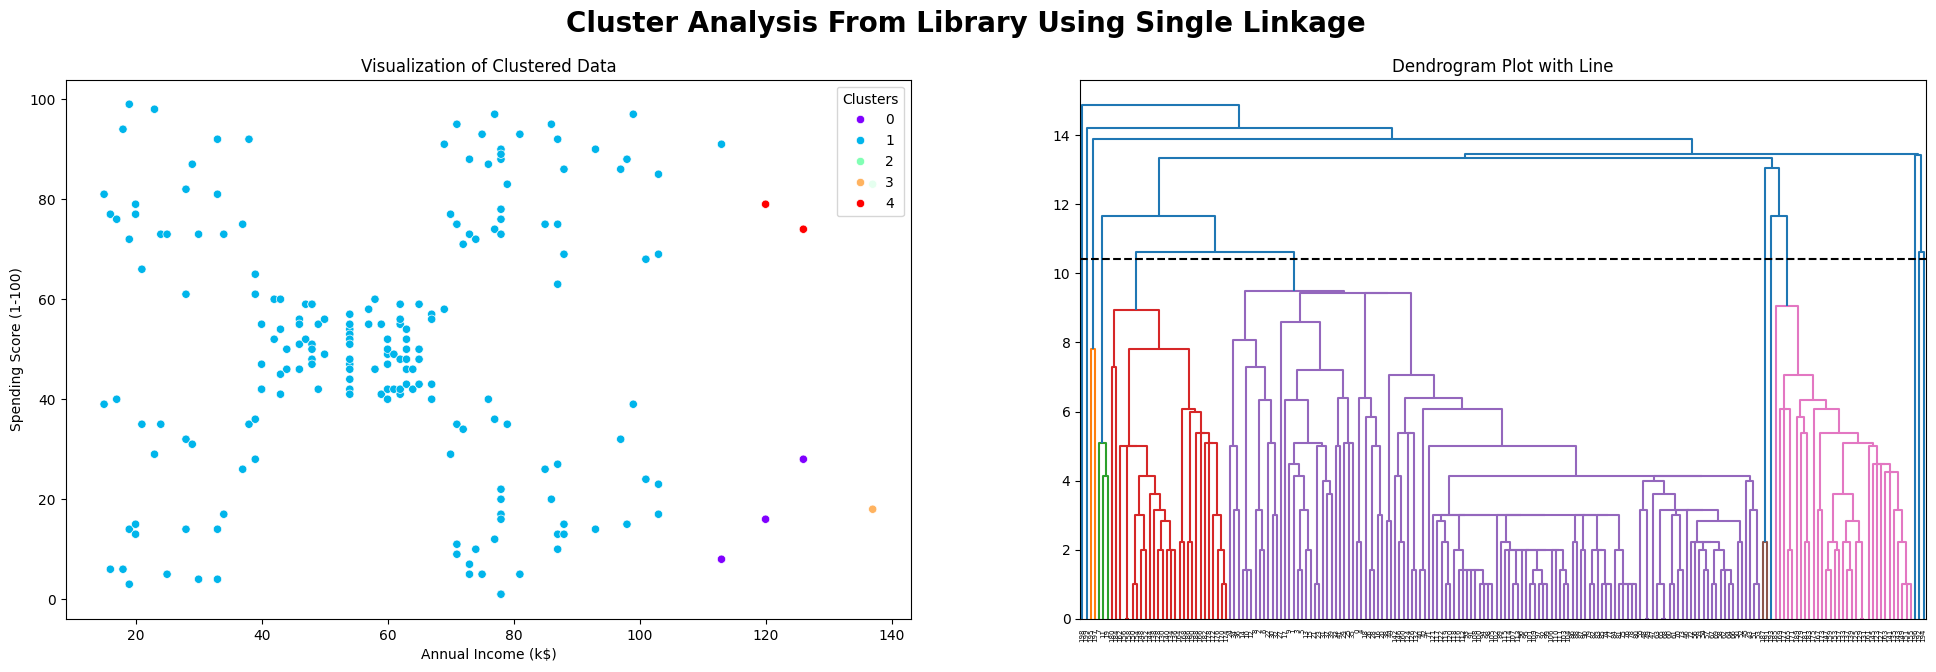

In [146]:
show_plot(df, labels,"single")

#### Agglomerative Clustering From Scratch

In [147]:
agg_model = AgglomerativeClusteringFromScratch(n_clusters=5,linkage="single")
agg_model.fit(df)
agg_model.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2,
       3, 4], dtype=object)

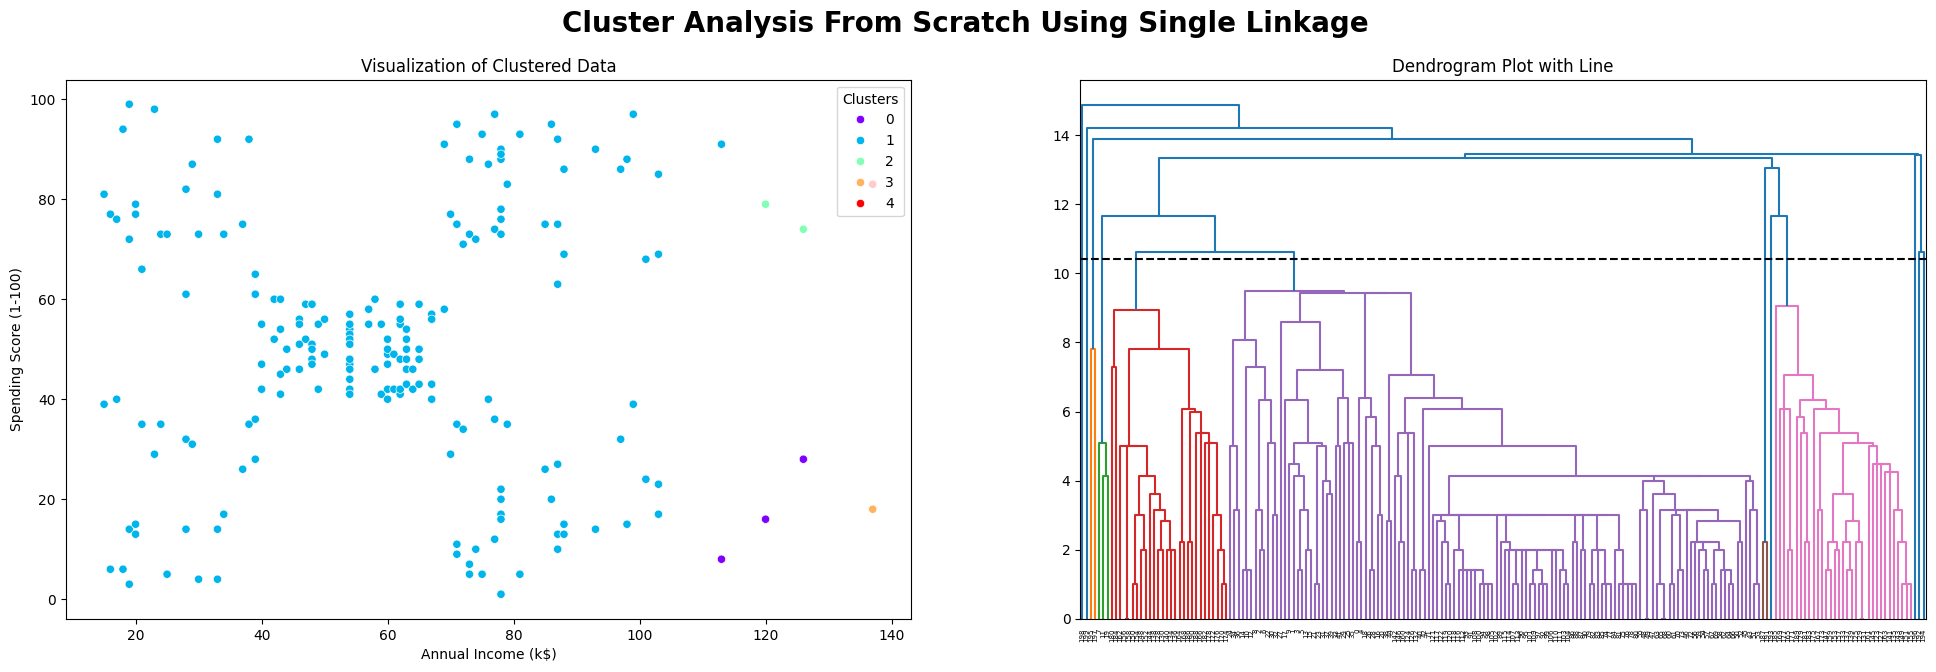

In [148]:
agg_model.visualize(show_dendrogram=True)

### **Complete Linkage**

#### Sklearn Agglomerative Clustering

In [149]:
model = sklearn_agglomerative_clustering(df,n_clusters = 5,linkage = "complete")
labels = model.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

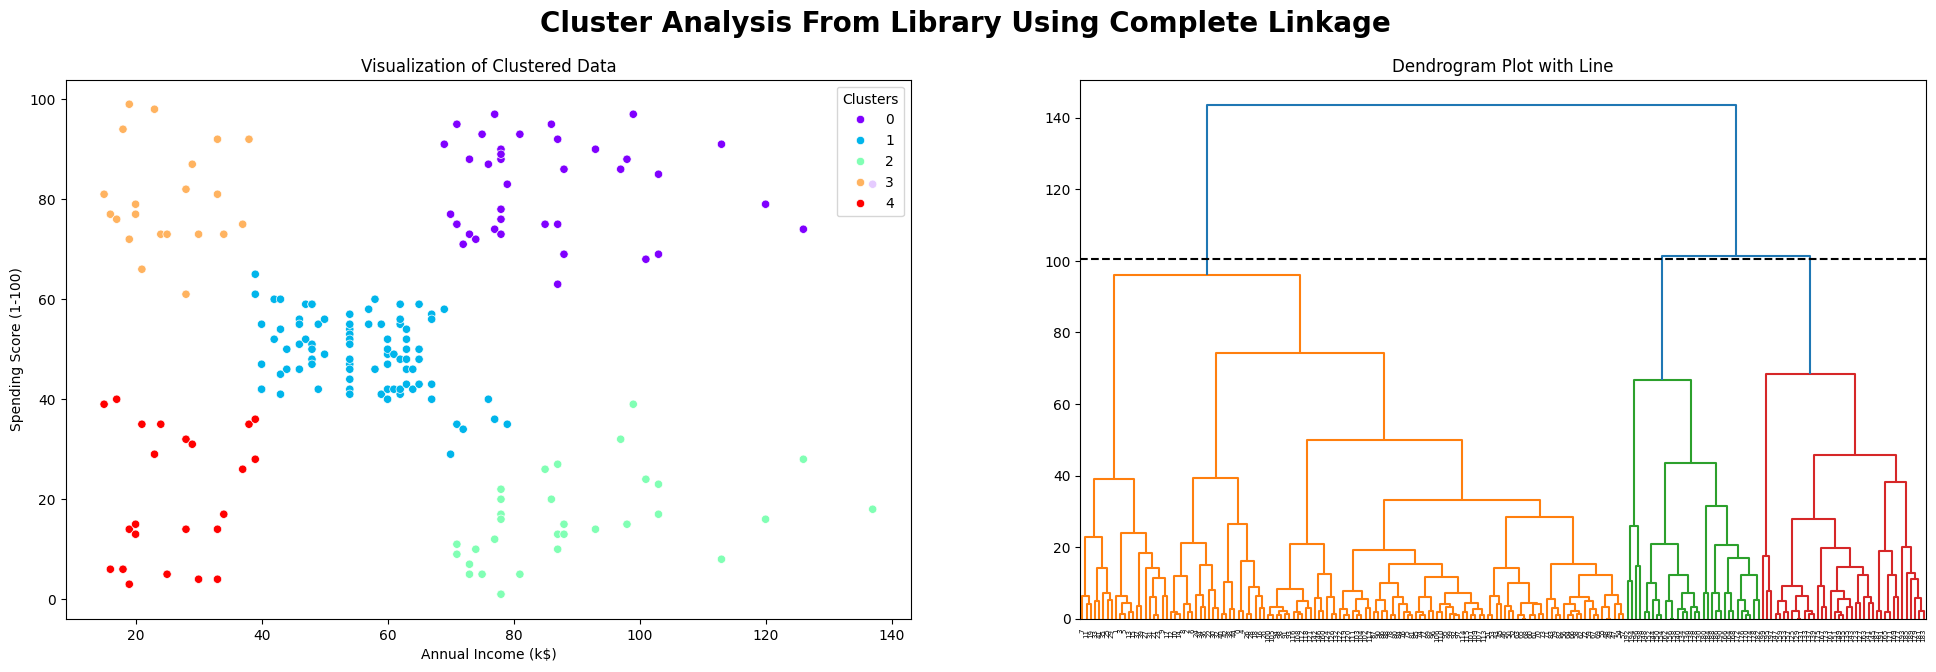

In [150]:
show_plot(df, labels,"complete")

#### Agglomerative Clustering From Scratch

In [151]:
agg_model = AgglomerativeClusteringFromScratch(n_clusters=5,linkage="complete")
agg_model.fit(df)
agg_model.labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=object)

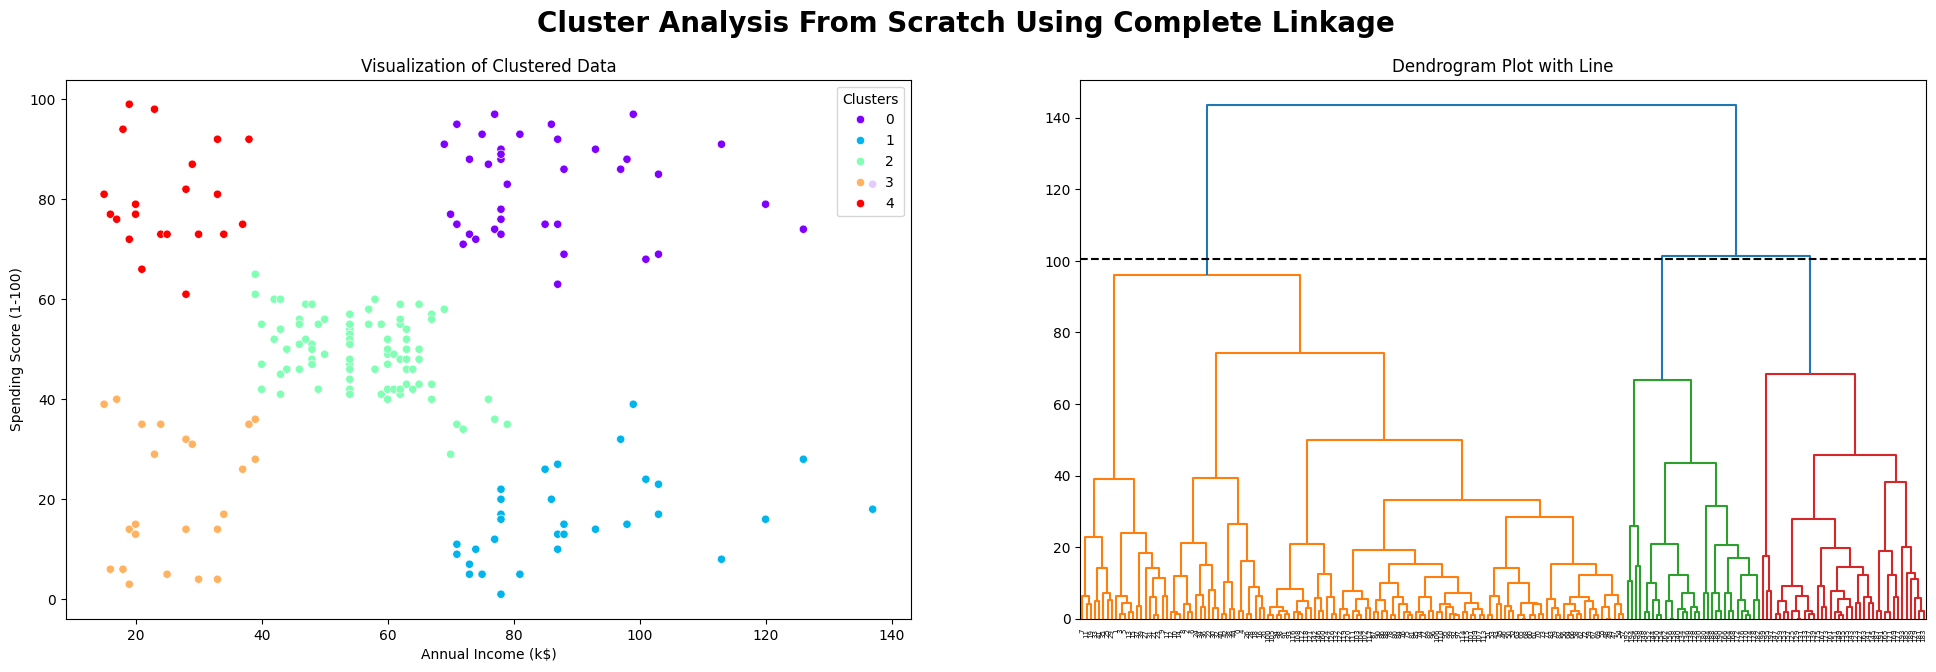

In [152]:
agg_model.visualize(show_dendrogram=True)

### **Average Linkage**

#### Sklearn Agglomerative Clustering

In [153]:
model = sklearn_agglomerative_clustering(df,n_clusters = 5,linkage = "average")
labels = model.labels_
labels

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4], dtype=int64)

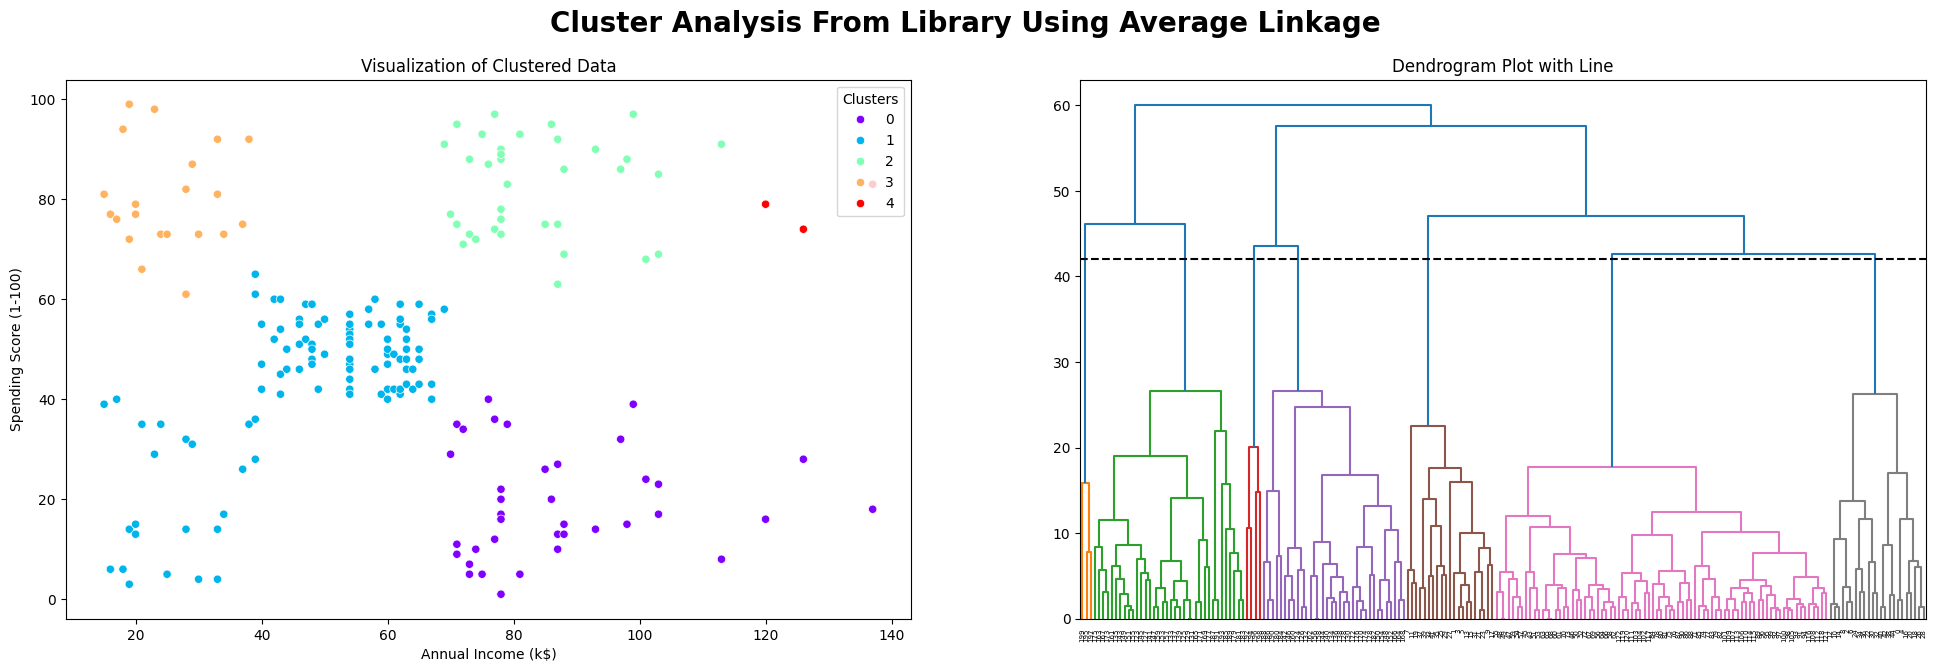

In [154]:
show_plot(df, labels,"average")

#### Agglomerative Clustering From Scratch

In [155]:
agg_model = AgglomerativeClusteringFromScratch(n_clusters=5,linkage="average")
agg_model.fit(df)
agg_model.labels

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4], dtype=object)

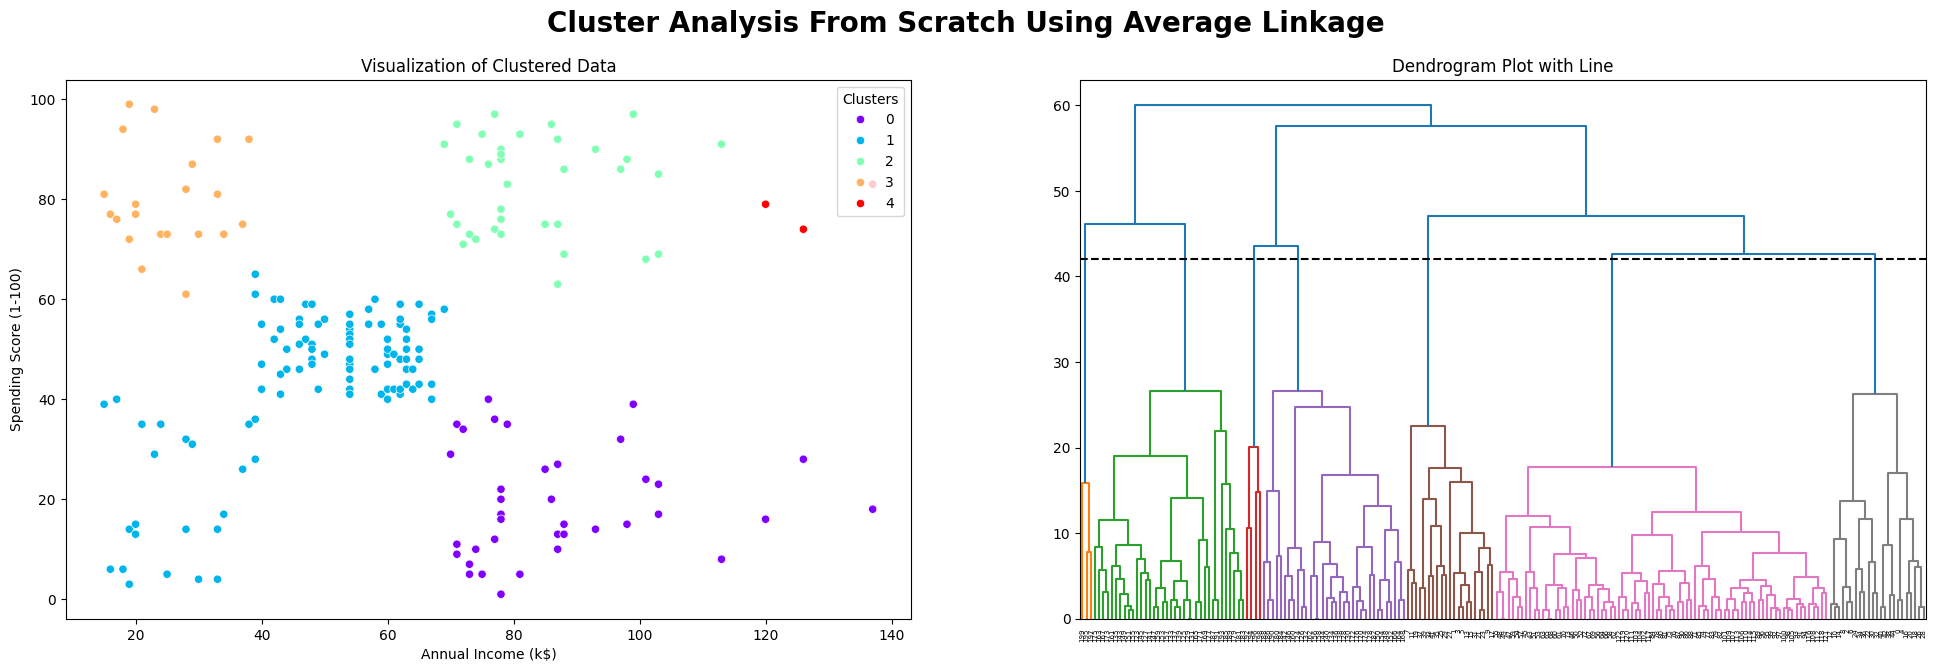

In [156]:
agg_model.visualize(show_dendrogram=True)

### **Ward Linkage**

#### Sklearn Agglomerative Clustering

In [157]:
model = sklearn_agglomerative_clustering(df,n_clusters = 5,linkage = "ward")
labels = model.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

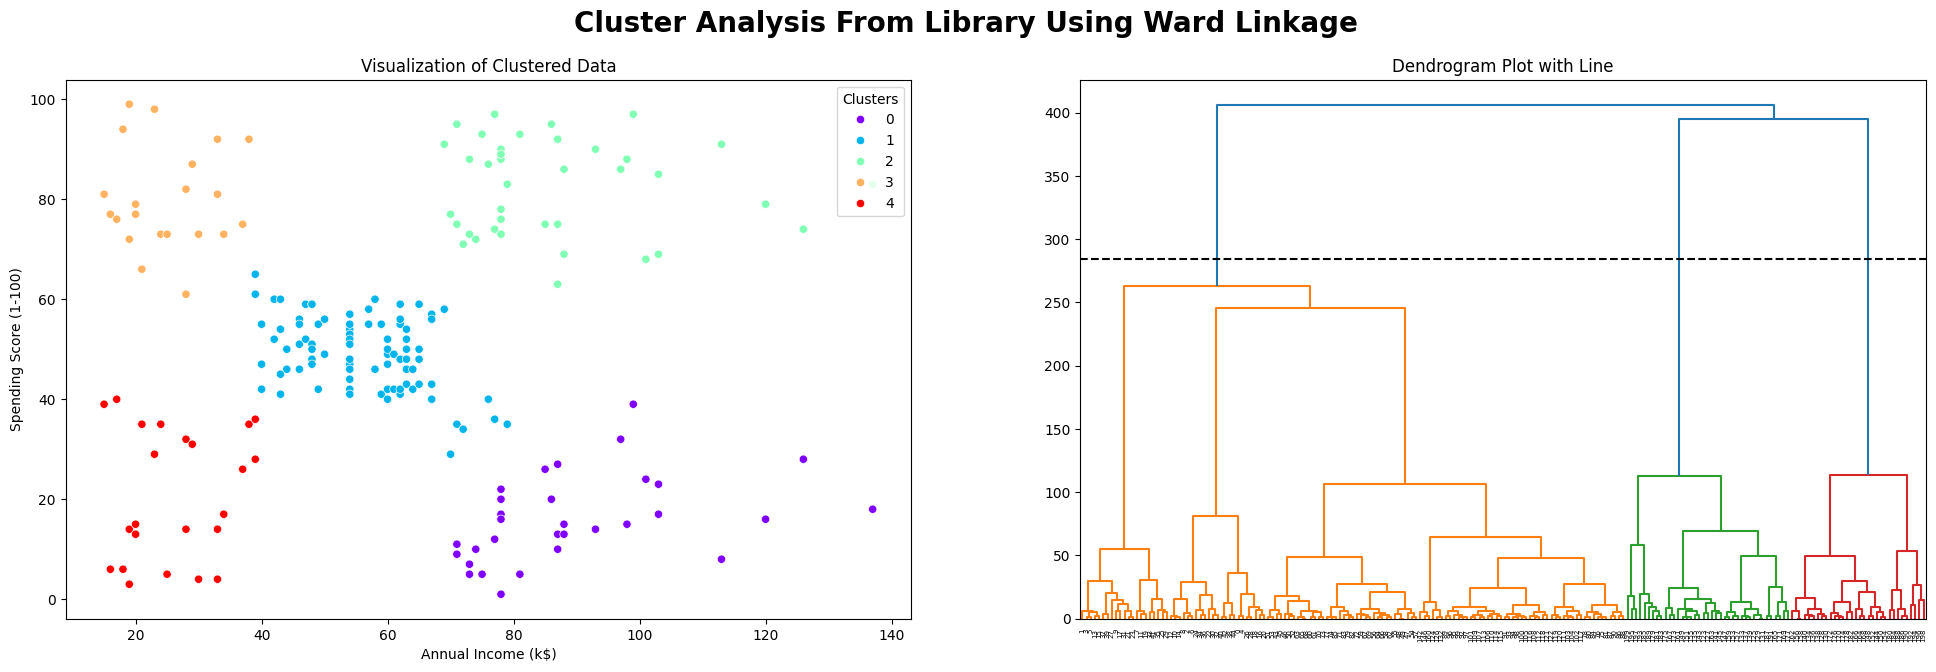

In [158]:
show_plot(df, labels,"ward")

#### Agglomerative Clustering From Scratch

In [159]:
agg_model = AgglomerativeClusteringFromScratch(n_clusters=5,linkage="ward")
agg_model.fit(df)
agg_model.labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=object)

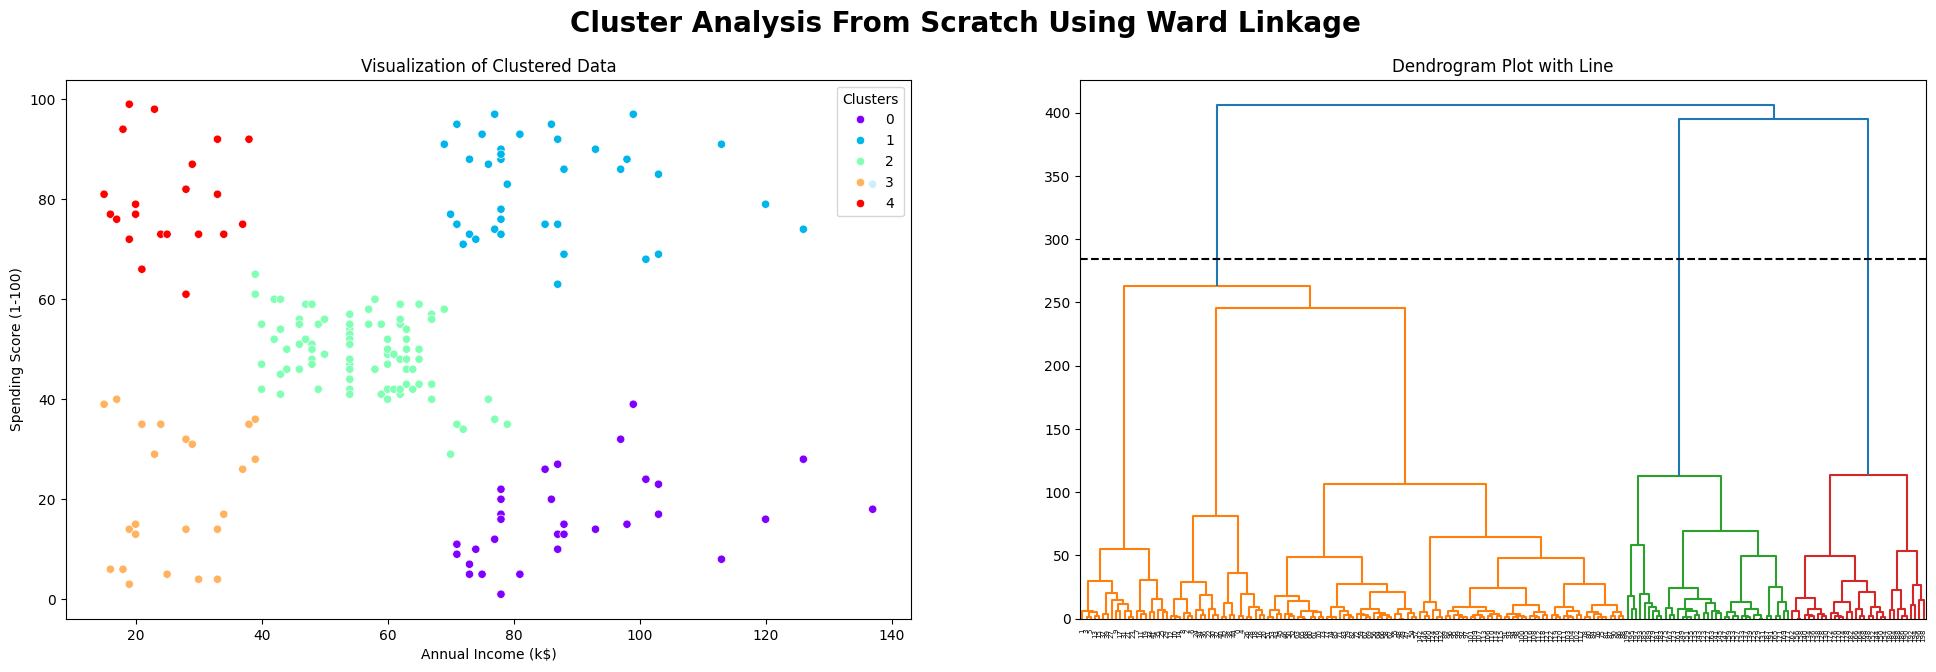

In [160]:
agg_model.visualize(show_dendrogram=True)